In [67]:
# Importing the required libraries

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [68]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [69]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [154]:
df = pd.read_csv('./rock_edge_list.csv')
genre = "Rock"
# Create an undirected graph
G = nx.Graph()

# Add edges without weights (if you need weights, modify accordingly)
G.add_edges_from(df[['Node1', 'Node2']].values)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(num_nodes)
print(num_edges)

524
6000


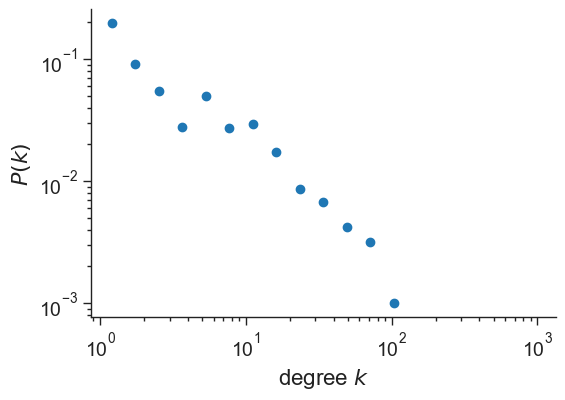

In [155]:
# Let's plot the degree distribution

plot_degree_dist(G)

In [156]:
# ...and calculate the clustering coefficient and average path length

# another way of calculating clustering coefficient using nx
C = nx.average_clustering(G)

# Find the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc).copy()

# calculate the average shortest path length using the largest connected component 
# as the graph is not fully connected
d = nx.average_shortest_path_length(G_lcc)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)

Average Clustering Coefficient:  0.4359610497692023
Average Shortest Path:  3.455956950402649


In [112]:
num_iterations = 1000  # Number of RGGs to generate
dim = 2  # 2D space

# Initialize lists to store results
clustering_RGG = []
short_path_RGG = []

def generate_geometric_graph(N, r):
    """Generates a 2D random geometric graph with threshold r"""
    positions = {i: np.random.rand(dim) for i in range(N)}
    G = nx.Graph()
    G.add_nodes_from(positions.keys())
    
    for i in range(N):
        for j in range(i + 1, N):
            if np.linalg.norm(positions[i] - positions[j]) < r:
                G.add_edge(i, j)
    
    return G, positions

# Estimate an initial threshold using theory
r_estimated = np.sqrt((2 * num_edges) / (np.pi * num_nodes * (num_nodes - 1)))

# Run 1000 simulations
for _ in range(num_iterations):
    RGG, pos = generate_geometric_graph(num_nodes, r_estimated)
    
    C_RGG = np.mean(list(nx.clustering(RGG).values()))
    if nx.is_connected(RGG)==True:
        d_RGG = nx.average_shortest_path_length(RGG,weight=None)
    clustering_RGG.append(C_RGG)
    short_path_RGG.append(d_RGG)

# calculate mean and standard deviation of clustering
print("Clustering mean: ", np.mean(clustering_RGG))
print("Clustering standard deviation: ", np.std(clustering_RGG))

# calculate mean and standard deviation of shortest path length
print("Shortest path length mean: ", np.mean(short_path_RGG))
print("Shortest path length standard deviation: ", np.std(short_path_RGG))


Clustering mean:  0.6275216233302672
Clustering standard deviation:  0.0060419519645763505
Shortest path length mean:  5.430971014492754
Shortest path length standard deviation:  0.09109105026634512


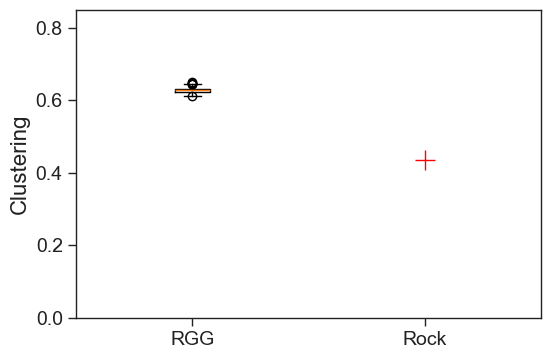

In [157]:
# opening a figure
fig = plt.figure(figsize=(6,4))

# creating a boxplot of distribution of clustering across the ensemble of RGG networks
plt.boxplot(clustering_RGG)
# # Creating a boxplot without outliers
# plt.boxplot(clustering_RGG, showfliers=False)
# plot real data (C)
plt.plot(2,C,'r',marker='+',markersize=15)
# axis settings
ax = plt.gca()
ax.set_xticks([1,2],labels=['RGG',genre])
plt.ylabel('Clustering')

# Ensure y-axis starts at 0
plt.ylim([0, max(max(clustering_RGG), C) + 0.2])

plt.xlim([0.5,2.5])
plt.show()

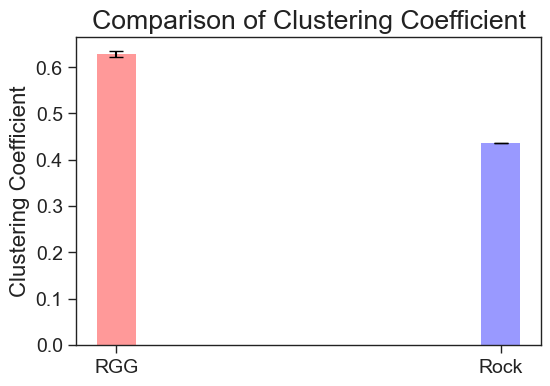

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation of RGG clustering
mean_clustering_RGG = np.mean(clustering_RGG)
std_clustering_RGG = np.std(clustering_RGG)

# Actual network clustering coefficient
mean_clustering_Blues = C  # Assuming C is a scalar value for Blues genre

# Data for the plot
labels = ["RGG", genre]
means = [mean_clustering_RGG, mean_clustering_Blues]
std_devs = [std_clustering_RGG, 0]  # No standard deviation for a single data point

# Create bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.1  # Reduced bar width
plt.bar(labels, means, yerr=std_devs, capsize=5, color=['red', 'blue'], alpha=0.4, width=bar_width)

# Labeling
plt.ylabel("Clustering Coefficient")
plt.title("Comparison of Clustering Coefficient")
plt.show()



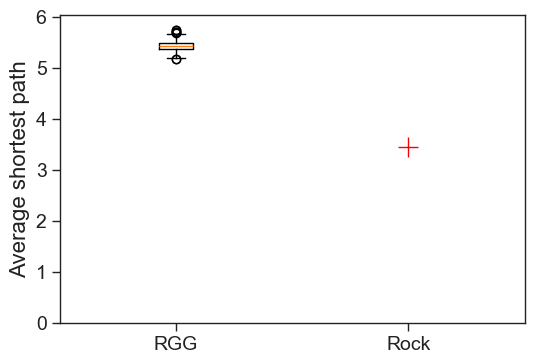

In [159]:
fig = plt.figure(figsize=(6,4))

plt.boxplot(short_path_RGG)
plt.plot(2,d,'r',marker='+',markersize=15)
ax = plt.gca()
ax.set_xticks([1,2],labels=['RGG',genre])
plt.ylabel('Average shortest path')

# Ensure y-axis starts at 0
plt.ylim([0, max(max(short_path_RGG), C) + 0.3])

plt.xlim([0.5,2.5])
plt.show()

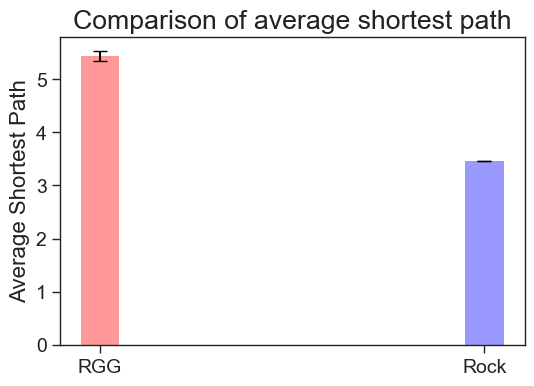

In [160]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation of RGG shortest path
mean_shortest_path_RGG = np.mean(short_path_RGG)
std_shortest_path_RGG = np.std(short_path_RGG)

# Actual network shortest path
mean_short_path_Blues = d 

# Data for the plot
labels = ["RGG", genre]
means = [mean_shortest_path_RGG, mean_short_path_Blues]
std_devs = [std_shortest_path_RGG, 0]  # No standard deviation for a single data point

# Create bar plot
plt.figure(figsize=(6, 4))
bar_width = 0.1  # Reduced bar width
plt.bar(labels, means, yerr=std_devs, capsize=5, color=['red', 'blue'], alpha=0.4, width=bar_width)

# Labeling
plt.ylabel("Average Shortest Path")
plt.title("Comparison of average shortest path")
plt.show()

In [161]:
import pandas as pd
import os

# Define the data as a dictionary
data = {
    "graph_id": [genre],  # Music genre
    "num_nodes": [num_nodes],  # Number of nodes in the brain network
    "num_edges": [num_edges],  # Number of edges in the brain network
    "clustering_mean": [C],  # Clustering coefficient of actual network
    "avg_shortest_path": [d],  # Shortest path length of actual network
    "RGG_clustering_mean": [np.mean(clustering_RGG)],  # Null model clustering mean
    "RGG_clustering_std": [np.std(clustering_RGG)],  # Null model clustering standard deviation
    "RGG_shortest_path_mean": [np.mean(short_path_RGG)],  # Null model shortest path mean
    "RGG_shortest_path_std": [np.std(short_path_RGG)]  # Null model shortest path standard deviation
}

# Convert to a Pandas DataFrame
df = pd.DataFrame(data)

csv_filename = "RGG_null_model_metrics.csv"

# Check if file already exists
if os.path.exists(csv_filename):
    # Append new data without writing the header again
    df.to_csv(csv_filename, mode='a', header=False, index=False)
else:
    # If the file does not exist, create it with headers
    df.to_csv(csv_filename, mode='w', header=True, index=False)

print("CSV file saved successfully!")


CSV file saved successfully!
